In [1]:
import json
import sklearn
import numpy
import pandas as pd
from sklearn.impute import SimpleImputer ,KNNImputer
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from scipy.io import arff 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
import tensorflow as tf
import numpy as np
from sklearn.decomposition import PCA

C:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
def wrangle(path):
    data, meta = arff.loadarff(path)
    df = pd.DataFrame(data)
    bool_mapping = {df['class'].unique()[0]: False, df['class'].unique()[1]: True}
    df.replace(bool_mapping, inplace=True)
    return df

In [4]:
df=wrangle(r"D:\4year.arff")
df

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.159290,0.46240,0.077730,1.16830,-44.8530,0.467020,0.189480,0.82895,1.12230,0.38330,...,0.108990,0.415570,0.89101,0.001422,7.7928,4.9914,119.810,3.0465,3.05600,False
1,-0.127430,0.46243,0.269170,1.75170,7.5970,0.000925,-0.127430,1.16250,1.29440,0.53757,...,-0.089372,-0.237040,1.06250,0.150410,5.4327,3.4629,100.970,3.6150,3.47250,False
2,0.070488,0.23570,0.527810,3.23930,125.6800,0.163670,0.086895,2.87180,1.05740,0.67689,...,0.054286,0.104130,0.94571,0.000000,7.1070,3.3808,76.076,4.7978,4.78180,False
3,0.136760,0.40538,0.315430,1.87050,19.1150,0.504970,0.136760,1.45390,1.11440,0.58938,...,0.102630,0.232030,0.89737,0.073024,6.1384,4.2241,88.299,4.1337,4.64840,False
4,-0.110080,0.69793,0.188780,1.27130,-15.3440,0.000000,-0.110080,0.43282,1.73500,0.30207,...,0.439880,-0.364400,0.57153,0.000000,18.8010,2.7925,146.390,2.4934,15.03600,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9787,0.004676,0.54949,0.192810,1.38990,-39.0640,0.004676,0.013002,0.78627,0.97093,0.43205,...,-0.029937,0.010823,1.02990,0.127190,3.8159,3.3892,146.860,2.4854,3.93150,True
9788,-0.027610,0.60748,-0.029762,0.90591,-20.9230,-0.027610,-0.027610,0.55161,1.00730,0.33509,...,0.007198,-0.082395,0.99280,0.868910,23.0280,27.1360,37.047,9.8523,4.36810,True
9789,-0.238290,0.62708,0.090374,1.61250,-1.0692,-0.238290,-0.240360,0.28322,0.80307,0.17760,...,-0.245220,-1.341700,1.24520,2.700100,6.5694,4.1781,88.883,4.1065,0.79501,True
9790,0.097188,0.75300,-0.327680,0.43850,-214.2400,-0.331300,0.104280,0.32803,0.98145,0.24700,...,0.288240,0.393470,0.68127,0.508850,4.3246,35.5030,217.030,1.6818,1.31910,True


In [5]:
df.dtypes


Attr1     float64
Attr2     float64
Attr3     float64
Attr4     float64
Attr5     float64
           ...   
Attr61    float64
Attr62    float64
Attr63    float64
Attr64    float64
class        bool
Length: 65, dtype: object

In [6]:
df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,9791.000000,9791.000000,9791.000000,9749.000000,9.771000e+03,9791.000000,9791.000000,9773.000000,9792.000000,9791.000000,...,9.792000e+03,9771.000000,9791.000000,9776.000000,9791.000000,9178.000000,9760.000000,9.771000e+03,9749.000000,9561.000000
mean,0.043019,0.596404,0.130959,8.136600,6.465164e+01,-0.059273,0.059446,19.884016,1.882296,0.389040,...,7.686330e+03,-0.992263,0.035022,1.133287,0.856053,118.156064,25.194430,2.015157e+03,8.660813,35.949619
std,0.359321,4.587122,4.559074,290.647281,1.475939e+04,6.812754,0.533344,698.697015,17.674650,4.590299,...,7.605261e+04,77.007971,8.945365,8.038201,26.393305,3230.316692,1099.260821,1.171461e+05,60.838202,483.318623
min,-12.458000,0.000000,-445.910000,-0.045319,-3.794600e+05,-486.820000,-12.458000,-1.848200,-0.032371,-445.910000,...,-7.132200e+05,-7522.100000,-597.420000,-30.892000,-284.380000,0.000000,-12.656000,-1.496500e+04,-0.024390,-0.000015
25%,0.001321,0.263145,0.020377,1.047000,-5.121700e+01,-0.000578,0.003004,0.428300,1.006675,0.294440,...,2.184000e+01,0.003121,0.008768,0.885722,0.000000,5.356325,4.267700,4.323400e+01,2.938800,2.012900
50%,0.041364,0.467740,0.199290,1.591800,-5.557600e-02,0.000000,0.048820,1.088700,1.161300,0.510450,...,9.503300e+02,0.043679,0.098026,0.958305,0.002129,9.482000,6.283550,7.472900e+01,4.848900,4.041600
75%,0.111130,0.689255,0.410670,2.880400,5.573200e+01,0.065322,0.126940,2.691000,1.970225,0.714290,...,4.694550e+03,0.117170,0.242680,0.996163,0.211790,19.506000,9.938200,1.233450e+02,8.363800,9.413500
max,20.482000,446.910000,22.769000,27146.000000,1.034100e+06,322.200000,38.618000,53209.000000,1704.800000,12.602000,...,6.123700e+06,112.020000,226.760000,668.750000,1661.000000,251570.000000,108000.000000,1.077900e+07,5662.400000,21153.000000


In [7]:
df.isnull().sum()

Attr1       1
Attr2       1
Attr3       1
Attr4      43
Attr5      21
         ... 
Attr61     32
Attr62     21
Attr63     43
Attr64    231
class       0
Length: 65, dtype: int64

In [8]:
df.duplicated().sum()

82

In [9]:
df.drop_duplicates(inplace=True)

<AxesSubplot:>

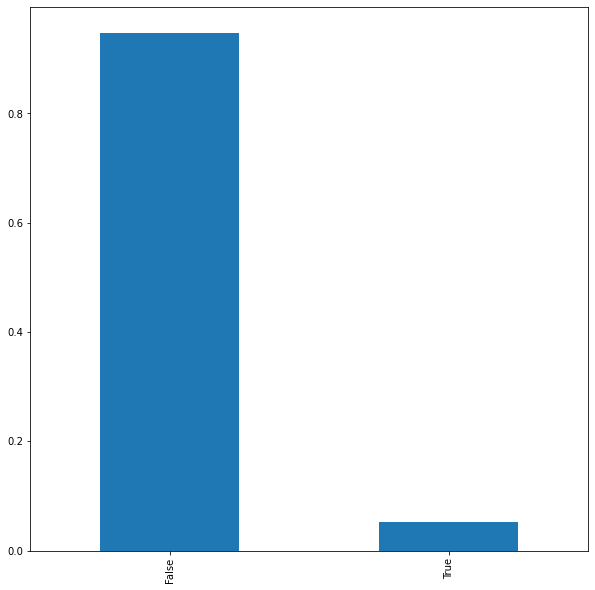

In [10]:
plt.figure(figsize=(10,10))
df['class'].value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:>

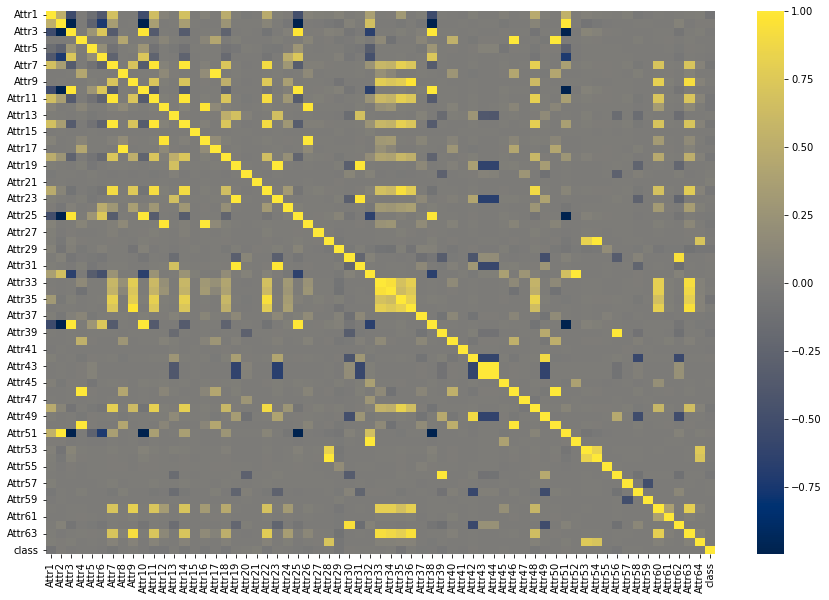

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap="cividis")

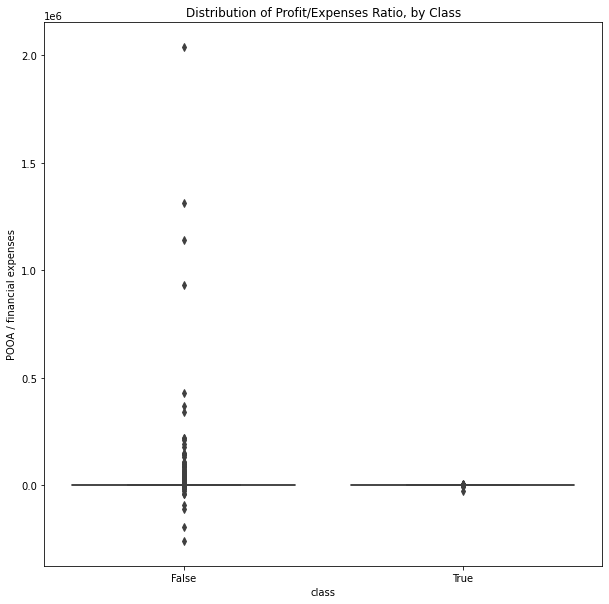

In [12]:
#lets take a random feature to test it attr 27 is =profit on operating activities / financial expenses
plt.figure(figsize=(10,10))
sns.boxplot(x="class",y="Attr27",data=df)
plt.xlabel("class")
plt.ylabel("POOA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class");

In [13]:
df['Attr27'].describe().apply("{0:,.0f}".format)

count        9,075
mean         1,123
std         31,570
min       -259,010
25%              0
50%              1
75%              5
max      2,037,300
Name: Attr27, dtype: object

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


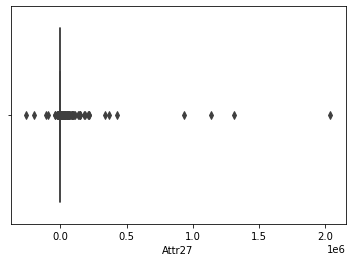

In [14]:
sns.boxplot(df['Attr27']);

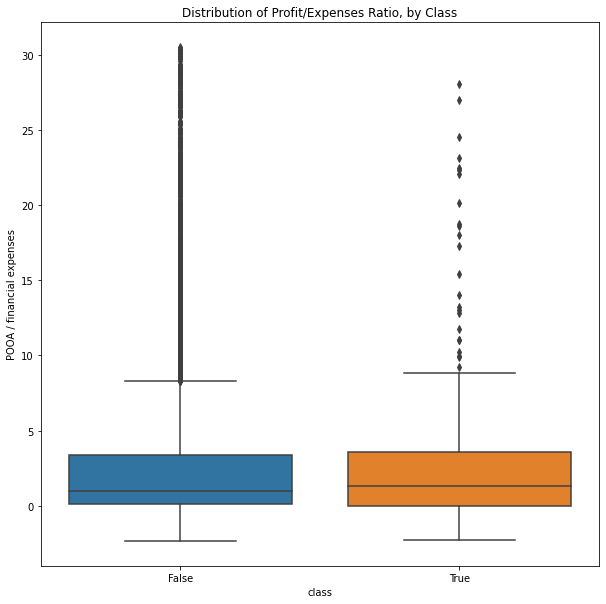

In [15]:
q1,q9=df['Attr27'].quantile([0.1,0.9])
m=df['Attr27'].between(q1,q9)
plt.figure(figsize=(10,10))
sns.boxplot(x="class",y="Attr27",data=df[m])
plt.xlabel("class")
plt.ylabel("POOA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class");

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


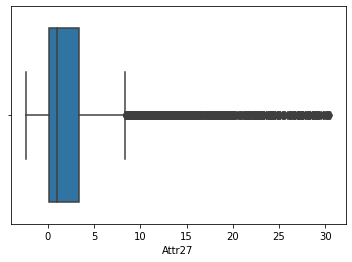

In [16]:
sns.boxplot(df[m]['Attr27']);

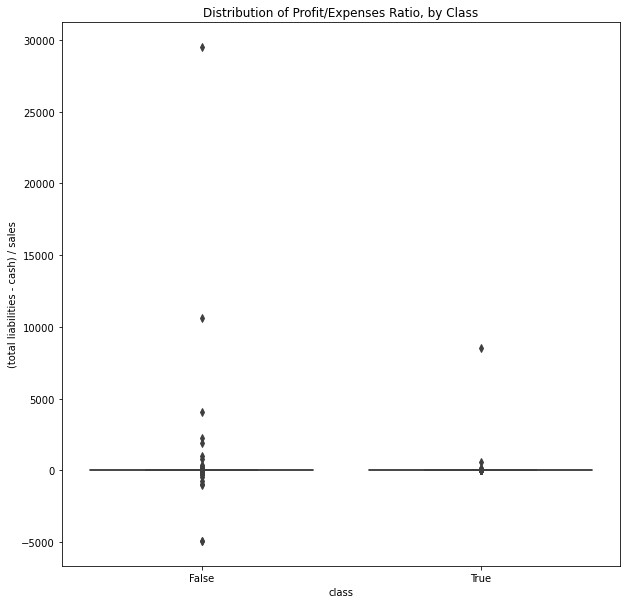

In [17]:
#lets take another one like Attr 30 is =(total liabilities - cash) / sales
plt.figure(figsize=(10,10))
sns.boxplot(x="class",y="Attr30",data=df)
plt.xlabel("class")
plt.ylabel("(total liabilities - cash) / sales")
plt.title("Distribution of Profit/Expenses Ratio, by Class");

In [18]:
df['Attr30'].describe().apply("{0:,.0f}".format)

count     9,690
mean          5
std         342
min      -4,940
25%           0
50%           0
75%           0
max      29,526
Name: Attr30, dtype: object

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attr30'>

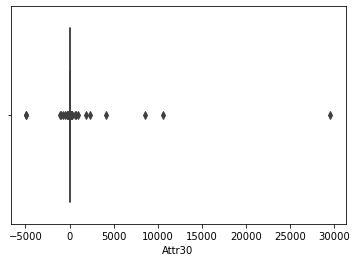

In [19]:
sns.boxplot(df['Attr30'])

Text(0, 0.5, 'Count')

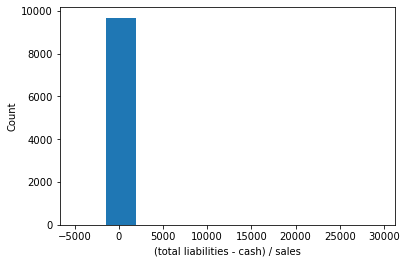

In [20]:
plt.hist(df['Attr30'])
plt.xlabel("(total liabilities - cash) / sales")
plt.ylabel("Count")

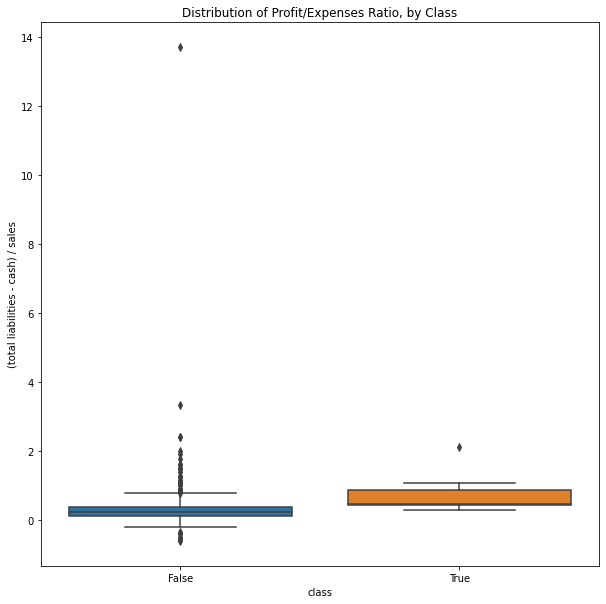

In [21]:
q3,q7=df['Attr30'].quantile([0.3,0.7])
m=df['Attr27'].between(q3,q7)
plt.figure(figsize=(10,10))
sns.boxplot(x="class",y="Attr30",data=df[m])
plt.xlabel("class")
plt.ylabel("(total liabilities - cash) / sales")
plt.title("Distribution of Profit/Expenses Ratio, by Class");

In [22]:
# Function to detect outliers
def outlier_detecting(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


# function to remove outliers
def outlier_removing(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_detecting(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = dataframe[variable].mean()
        dataframe.loc[(dataframe[variable] > up_limit), variable] = dataframe[variable].mean()

In [23]:
outlier_removing(df,df.drop(['class'],axis=1))

In [24]:
target = "class"
X = df.drop(target,axis=1)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (9710, 64)
y shape: (9710,)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.4)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7282, 64)
y_train shape: (7282,)
X_test shape: (2428, 64)
y_test shape: (2428,)


In [26]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print(X_train_over.shape)
X_train_over.head()

(13806, 64)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.042952,0.94872,-0.274570,0.600910,-69.330000,0.000000,0.059445,0.054055,2.4388,0.051283,...,-207.100,-0.160510,0.034518,1.159700,1.074762,9.4303,25.358849,102.970,3.5448,4.157600
1,0.052899,0.25172,0.208410,1.958400,72.795000,0.140924,0.067078,2.972600,1.0691,0.748280,...,7261.000,0.064613,0.070694,0.935390,0.045800,22.2140,2.396800,92.003,3.9673,1.502600
2,0.042952,1.26560,0.000562,1.000600,0.091055,0.000000,0.059445,-0.209890,1.5232,-0.265640,...,0.075,-1.001463,0.335517,1.192727,0.000000,NaN,2.108000,231.400,1.5773,36.191506
3,0.077592,0.13475,0.750550,8.181403,409.885892,0.140924,0.092740,20.022198,1.6584,0.865250,...,3741.200,0.043699,0.335517,1.135243,0.000000,9.4621,2.758300,25.258,14.4510,12.312000
4,0.017277,0.59580,0.212510,1.392400,-30.425000,0.000000,0.022811,0.678410,2.2837,0.404200,...,10175.000,0.015395,0.042745,0.990150,0.097392,5.9279,6.541500,86.557,4.2169,9.285400


<AxesSubplot:>

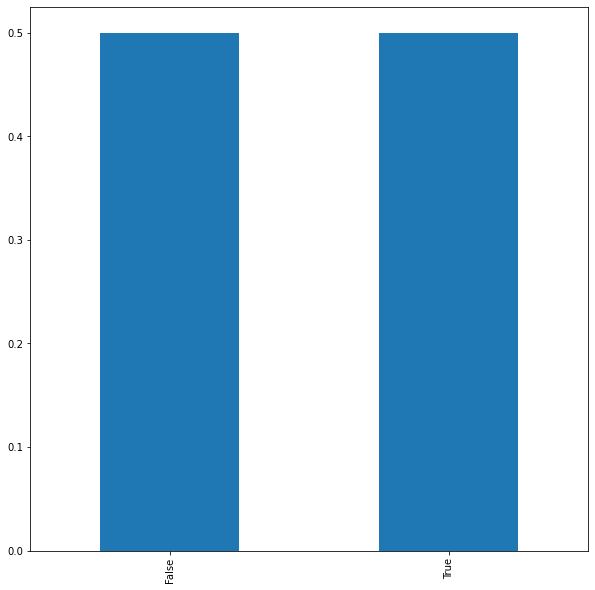

In [27]:
plt.figure(figsize=(10,10))
y_train_over.value_counts(normalize=True).plot(kind='bar')

In [28]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.948


In [29]:
clf1 = make_pipeline(
        SimpleImputer(strategy='mean'),
        SelectKBest(score_func=f_classif, k=60),
        RandomForestClassifier(random_state=42))
print(clf1)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('selectkbest', SelectKBest(k=60)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


In [30]:
clf1.fit(X_train_over,y_train_over)
print("the score of training over data : ",clf1.score(X_train,y_train))
print("the score of testing data : ",clf1.score(X_test,y_test))

the score of training over data :  1.0
the score of testing data :  0.9456342668863262


In [31]:
cv_acc_scores = cross_val_score(clf1,X_test,y_test,cv=5,n_jobs=-1)
cv_acc_scores

array([0.94444444, 0.9382716 , 0.94032922, 0.94845361, 0.94020619])

In [32]:
params = {
    "simpleimputer__strategy":["mean","median"]
    ,'selectkbest__k':range(45,65,5)
    ,"randomforestclassifier__n_estimators":range(25,100,25)
    ,"randomforestclassifier__max_depth":range(50,100,10)
}
model = GridSearchCV(
    clf1,
    param_grid=params,cv=5,n_jobs=-1,verbose=1
)
model.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('selectkbest', SelectKBest(k=60)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(50, 100, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'selectkbest__k': range(45, 65, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [33]:
print("score of training data : ",model.score(X_train,y_train))
print("score of testing data : ",model.score(X_test,y_test))

score of training data :  1.0
score of testing data :  0.9448105436573312


<Figure size 3600x3600 with 0 Axes>

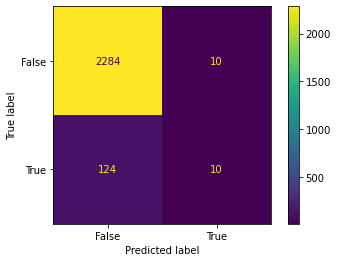

In [34]:
plt.figure(figsize=(50,50))
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);

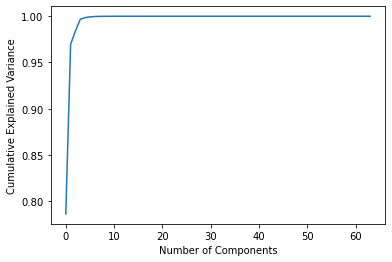

In [35]:
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(X_train)
pca = PCA().fit(imputed_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [36]:
clf2 = make_pipeline(
        KNNImputer(n_neighbors=15)
        ,PCA(random_state=42,n_components=5),
        SVC(random_state=42,gamma='auto')
)
print(clf2)

Pipeline(steps=[('knnimputer', KNNImputer(n_neighbors=15)),
                ('pca', PCA(n_components=5, random_state=42)),
                ('svc', SVC(gamma='auto', random_state=42))])


In [37]:
clf2.fit(X_train,y_train)
print("the score of testing data : ",clf2.score(X_test,y_test))

the score of testing data :  0.9427512355848435


In [ ]:
params = {
    "knnimputer__n_neighbors":range(15,36,10)
    ,'pca__n_components':range(0,15,2)

}
model = GridSearchCV(
    clf2,
    param_grid=params,cv=5,n_jobs=-1,verbose=1
)
model.fit(X_train_over,y_train_over)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [ ]:
print("score of training data : ",model.score(X_train,y_train))
print("score of testing data : ",model.score(X_test,y_test))

In [ ]:
plt.figure(figsize=(1000,1000))
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);

In [2]:
def wrangle2(path):
    df2=pd.read_csv(path)
    df2.drop(['id','Unnamed: 32'],axis=1,inplace=True)
    bool_mapping = {df2['diagnosis'].unique()[1]: False, df2['diagnosis'].unique()[0]: True}
    df2.replace(bool_mapping, inplace=True)
    return df2

In [3]:
df2=wrangle2("D:\\faculty\\semester 5\\data science tools\\project\\Cancer_Data.csv")
df2

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,True,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,True,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,True,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,True,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,True,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,True,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,True,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,True,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,True,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df2.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
df2.duplicated().unique()

array([False])

In [6]:
target = "diagnosis"
X = df2.drop(target,axis=1)
y = df2[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (569, 30)
y shape: (569,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.4)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (341, 30)
y_train shape: (341,)
X_test shape: (228, 30)
y_test shape: (228,)


In [23]:
normalizer = tf.keras.layers.Normalization(axis=-1)
numeric_features = X_train.astype(np.float32)
normalizer.adapt(numeric_features)

def build_model():
    model = tf.keras.Sequential([
        normalizer,
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', metrics=['binary_accuracy'], optimizer='adam')
    return model

model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 30)                61        
 tion)                                                           
                                                                 
 dense_6 (Dense)             (None, 64)                1984      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10494 (41.00 KB)
Trainable params: 10433 (40.75 KB)
Non-trainable params: 61 (248.00 Byte)
_________________________________________________________________


In [24]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=6)
history = model.fit(X_train,
                         y_train,
                         epochs=500,
                         verbose=1, batch_size=32, 
                    validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/500
9/9 [==============================] - 2s 55ms/step - loss: 0.6428 - binary_accuracy: 0.6324 - val_loss: 0.4193 - val_binary_accuracy: 0.7826
Epoch 2/500
9/9 [==============================] - 0s 19ms/step - loss: 0.3524 - binary_accuracy: 0.8934 - val_loss: 0.2620 - val_binary_accuracy: 0.9275
Epoch 3/500
9/9 [==============================] - 0s 19ms/step - loss: 0.2217 - binary_accuracy: 0.9632 - val_loss: 0.1820 - val_binary_accuracy: 0.9420
Epoch 4/500
9/9 [==============================] - 0s 35ms/step - loss: 0.1575 - binary_accuracy: 0.9669 - val_loss: 0.1429 - val_binary_accuracy: 0.9565
Epoch 5/500
9/9 [==============================] - 0s 36ms/step - loss: 0.1221 - binary_accuracy: 0.9706 - val_loss: 0.1212 - val_binary_accuracy: 0.9565
Epoch 6/500
9/9 [==============================] - 0s 20ms/step - loss: 0.0996 - binary_accuracy: 0.9779 - val_loss: 0.1093 - val_binary_accuracy: 0.9565
Epoch 7/500
9/9 [==============================] - 0s 18ms/step - loss: 0.08

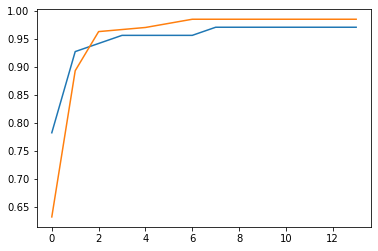

In [25]:
plt.plot(history.history['val_binary_accuracy'])
plt.plot(history.history['binary_accuracy'])

In [26]:
p = model.predict(X_test)

8/8 [==============================] - 0s 4ms/step


In [27]:
df_pred = X_test.copy()
df_pred['pred'] = p > 0.5

In [28]:
print("the accuracy of the model = ",sum(y_test == df_pred['pred']) / len(df_pred.index))

the accuracy of the model =  0.9824561403508771


In [29]:
print(classification_report(y_test, df_pred['pred']))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       148
        True       0.97      0.97      0.97        80

    accuracy                           0.98       228
   macro avg       0.98      0.98      0.98       228
weighted avg       0.98      0.98      0.98       228



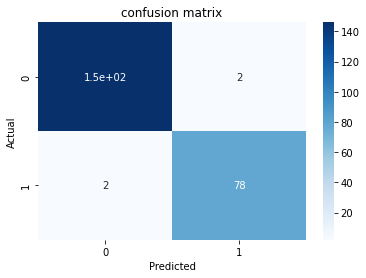

In [30]:
cm = sklearn.metrics.confusion_matrix(y_test, df_pred['pred'])
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('confusion matrix')
plt.show()